We look at the impact of theoretical uncertainties in PTA correlations analysis.

In [1]:
from getdist.mcsamples import loadMCSamples, MCSamples
import getdist.plots as gdplt
import os # requires *full path*

%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np
from numpy.random import multivariate_normal as MN

from PTAfast.hellingsdowns import HellingsDowns as HD

### Correlations data and likelihood

We consider the mock correlations data set, shown below.

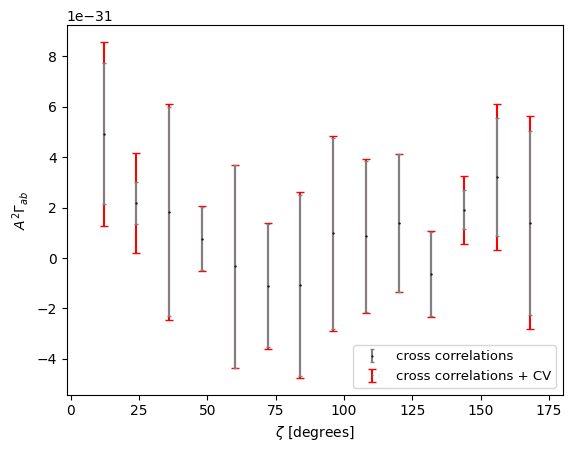

In [2]:
# import mock data
data_loc = 'mock.txt'
data = np.loadtxt(data_loc)

# mock cross correlations
tta = data[0]
ccp = data[1]
Dccp = data[2]

# visualize points
fig, ax = plt.subplots()
ax.errorbar(tta*180/np.pi, ccp, yerr = Dccp, zorder = 10, \
            label = 'cross correlations', \
            fmt = 'k.', markersize = 1, ecolor = 'gray', elinewidth = 1.5, capsize = 1.5)

# with cosmic variance
Dccp_cv = (1e-30)*np.sqrt(HD(lm = 60).get_ORF(tta)['CV']) + \
0.1*(1e-30)*HD(lm = 60).get_ORF(tta)['ORF']
Dccp_Total = np.sqrt(Dccp**2 + Dccp_cv**2)
ax.errorbar(tta*180/np.pi, ccp, yerr = Dccp_Total, \
            label = 'cross correlations + CV', \
            fmt = '.', markersize = 1, ecolor = 'red', elinewidth = 1.5, capsize = 3)

ax.set_xlim(-1.5, 180)
ax.set_xlabel(r'$\zeta$ [degrees]')
ax.set_ylabel(r'$A^2 \Gamma_{ab}$')
ax.legend(loc = 'lower right', prop = {'size': 9.5})
plt.show()

We now setup the likelihoods for tensor correlations, in `correlations_mock.py` and `correlations_mock_another.py`, taking into account the theoretical uncertainties (given by the cosmic variance). We use this later together with `cobaya` and `getdist` to study the sampled posterior of the GW parameters.

See code `correlations_another.py` for implementation for terminal. Sampling with Cobaya, e.g., `cobaya-run xxx.yaml` or with MPI `mpirun -n 8 cobaya-run xxx.yaml`.

Below, we import the results obtained from the sampling (saved in a folder "chains").

### Hellings-Downs correlations

In [3]:
folder_file_1 = 'chains/hd_mock_unc0'
folder_file_2 = 'chains/hd_mock_unc2'
folder_file_3 = 'chains/hd_mock_unc2_another'
folder_file_4 = 'chains/mon_mock'
folder_file_grn = 'chains/grn_mock' # gaussian random noise

gdsamples_1 = loadMCSamples(os.path.abspath(folder_file_1))
gdsamples_2 = loadMCSamples(os.path.abspath(folder_file_2))
gdsamples_3 = loadMCSamples(os.path.abspath(folder_file_3))
gdsamples_4 = loadMCSamples(os.path.abspath(folder_file_4))
gdsamples_grn = loadMCSamples(os.path.abspath(folder_file_grn))

# get statistics
stats_1 = gdsamples_1.getMargeStats()
stats_2 = gdsamples_2.getMargeStats()
stats_3 = gdsamples_3.getMargeStats()
stats_4 = gdsamples_4.getMargeStats()
stats_grn = gdsamples_grn.getMargeStats()

# convergence of each chains
print('hd : ', gdsamples_1.getGelmanRubin())
print('hd + cv (mock) : ', gdsamples_2.getGelmanRubin())
print('hd (mock + cv) : ', gdsamples_3.getGelmanRubin())
print('mon : ', gdsamples_4.getGelmanRubin())
print('GRN : ', gdsamples_grn.getGelmanRubin())

auto bandwidth for chi2 very small or failed (h=0.0004205057798940229,N_eff=1688.7801216267578). Using fallback (h=0.004688128693282373)
auto bandwidth for chi2 very small or failed (h=0.0005276843059769003,N_eff=3079.90057706485). Using fallback (h=0.004664785815270387)
auto bandwidth for chi2 very small or failed (h=0.0005456228481927293,N_eff=278.81153694192017). Using fallback (h=0.0009171303344452732)
fine_bins not large enough to well sample smoothing scale - chi2
fine_bins not large enough to well sample smoothing scale - chi2__loglike
fine_bins not large enough to well sample smoothing scale - chi2
fine_bins not large enough to well sample smoothing scale - chi2__loglike
hd :  0.002144368378263319
hd + cv (mock) :  0.0008758327746806704
hd (mock + cv) :  0.0030574574523066227
mon :  inf
GRN :  0.0023495500929302388


/home/kinwangngpc/miniconda3/lib/python3.9/site-packages/getdist/chains.py:1413: RuntimeWarning: divide by zero encountered in true_divide
  meanscov /= (len(chainlist) - 1)


We show the posteriors for the correlations with and without uncertainty.

auto bandwidth for chi2 very small or failed (h=0.0004205057798940229,N_eff=1688.7801216267578). Using fallback (h=0.004688128693282373)
auto bandwidth for chi2 very small or failed (h=0.0005276843059769003,N_eff=3079.90057706485). Using fallback (h=0.004664785815270387)
fine_bins_2D not large enough for optimal density: A2, chi2
fine_bins_2D not large enough for optimal density: A2, chi2


<Figure size 700x630 with 0 Axes>

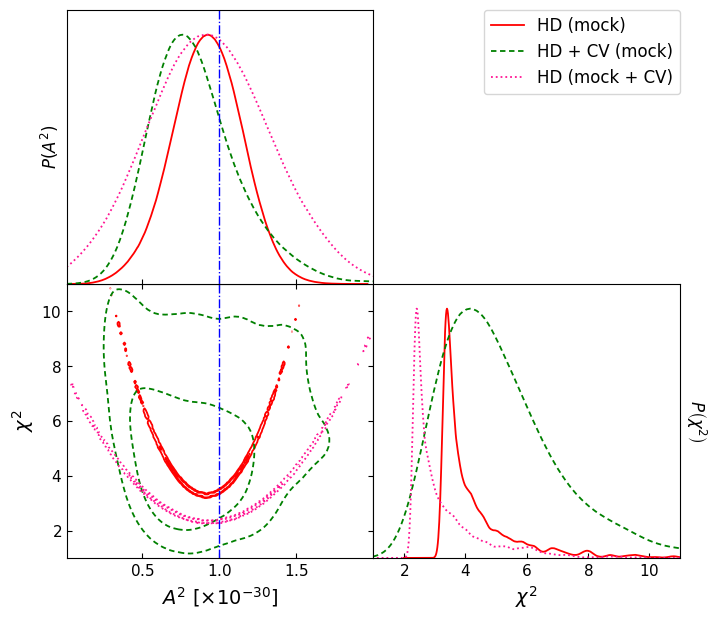

In [4]:
gdplot = gdplt.get_single_plotter(width_inch = 7, ratio = 9/10)
gdplot.triangle_plot([gdsamples_1, gdsamples_2, gdsamples_3], \
                     ["A2", "chi2"], \
                     contour_ls = ['-', '--', ':', ':'], \
                     contour_lws = [1.3, 1.3, 1.3, 1.3], \
                     contour_colors = ['red', 'green', 'deeppink', 'blue'], \
                     filled = False, \
                     title_limit = 0, \
                     legend_labels = ['HD (mock)', 'HD + CV (mock)', \
                                      'HD (mock + CV)'], \
                     legend_loc = 'upper right', \
                     param_limits = {'A2': (0.01, 2), 'chi2': (1, 11)})

# add y-axis labels manually
y_labels = [r'$P\left(A^2\right)$', r'$P\left(\chi^2\right)$'] # labels for y-axes
axes = gdplot.subplots
axes[0, 0].set_ylabel(y_labels[0])
axes[0, 0].yaxis.label.set_size(12)
axes[1, 1].set_ylabel(y_labels[1])
axes[1, 1].yaxis.label.set_size(12)
axes[1, 0].set_xlabel(r'$A^2$ [$\times 10^{-30}$]')
# get the lower right subplot
ax = gdplot.subplots[-1][-1]
# set the label on the right
ax.yaxis.set_label_position("right")
ax.yaxis.label.set_rotation(270)
ax.yaxis.set_label_coords(1.09, 0.5)

axes[0, 0].axvline(x = 1, color = 'blue', linestyle = '-.', linewidth = 1.0)
axes[1, 0].axvline(x = 1, color = 'blue', linestyle = '-.', linewidth = 1.0)

plt.show()

We print the statistics for each correlations model to see if this was impacted by the theoretical uncertainty.

In [5]:
print('monopole')
c2_monbf = stats_4.parWithName('chi2').bestfit_sample
print('chi^2 :', c2_monbf/len(tta))
print()

print('HD (mock)')
c2_HDbf = stats_1.parWithName('chi2').bestfit_sample
print('best chi^2 :', c2_HDbf/len(tta))
print()

print('HD + CV (mock)')
c2_HDbf = stats_2.parWithName('chi2').bestfit_sample
print('best chi^2 :', c2_HDbf/len(tta))
print()

print('HD (mock + CV)')
c2_HDbf = stats_3.parWithName('chi2').bestfit_sample
print('best chi^2 :', c2_HDbf/len(tta))
print()

print('Gaussian random noise (sigma)')
c2_grn = stats_grn.parWithName('chi2').bestfit_sample
print('best chi^2 :', c2_grn/len(tta))
print()

monopole
chi^2 : 0.4937310714285714

HD (mock)
best chi^2 : 0.2348821357142857

HD + CV (mock)
best chi^2 : 0.09381535714285714

HD (mock + CV)
best chi^2 : 0.16553062142857142

Gaussian random noise (sigma)
best chi^2 : 0.10978772142857142



We plot the mean curves for the sampled correlations with and without the cosmic variance.

In [6]:
# ORFs
lMax = 60
Zeta = np.logspace(np.log10(1e-3), np.log10(np.pi), 200)
Gab_HD = HD(lm = lMax).get_ORF(Zeta)

# without variance
A2Gab_HD0 = stats_1.parWithName('A2').mean*Gab_HD['ORF']

# with variance, mock + CV approach
A2Gab_HD1 = stats_2.parWithName('A2').mean*Gab_HD['ORF']
A2Gab_HD1_unc = stats_2.parWithName('A2').mean*np.sqrt(Gab_HD['CV']) + \
stats_2.parWithName('A2').err*Gab_HD['ORF']

# with variance, data + CV approach
A2Gab_HD2 = stats_3.parWithName('A2').mean*Gab_HD['ORF']
A2Gab_HD2_unc = stats_3.parWithName('A2').mean*np.sqrt(Gab_HD['CV']) + \
stats_3.parWithName('A2').err*Gab_HD['ORF']

# Gaussian random noise
A2_grn = stats_grn.parWithName('A2').mean
sigma_grn = stats_grn.parWithName('sigma').mean
A2Gab_grn_up = A2_grn*(0.5 + sigma_grn)
A2Gab_grn_low = A2_grn*(0.5 - sigma_grn)

Finally the mean curves are obtained and presented below together with their cosmic variances.

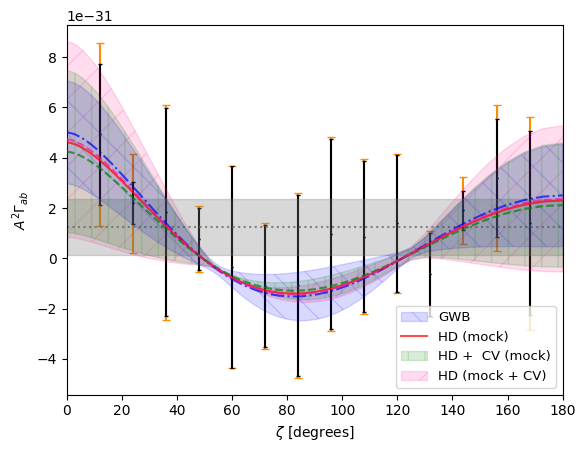

In [7]:
# plot best fits
fig, ax = plt.subplots()
ax.errorbar(tta*180/np.pi, ccp, yerr = Dccp_Total, zorder = 0, \
            fmt = '.', markersize = 1, ecolor = 'darkorange', \
            elinewidth = 1.5, capsize = 3)
ax.errorbar(tta*180/np.pi, ccp, yerr = Dccp, zorder = 0,
            fmt = 'k.', markersize = 1, ecolor = 'black', \
            elinewidth = 1.5, capsize = 1.5)

# actual gwb signal
A_gw = 1e-15
A2_gw = A_gw**2
ax.plot(Zeta*180/np.pi, A2_gw*Gab_HD['ORF'], zorder = 10, \
        alpha = 0.7, color = 'blue', ls = '-.')
ax.fill_between(Zeta*180/np.pi, \
                (Gab_HD['ORF'] - np.sqrt(Gab_HD['CV']))*A2_gw, \
                (Gab_HD['ORF'] + np.sqrt(Gab_HD['CV']))*A2_gw, \
                zorder = 9, facecolor = 'blue', edgecolor = 'blue', \
                alpha = 0.15, hatch = '\\', rasterized = True, label = r'GWB')

# GW correlations
ax.plot(Zeta*180/np.pi, A2Gab_HD0*(1e-30), zorder = 10, \
        alpha = 0.7, color = 'red', ls = '-', label = r'HD (mock)')

# with cosmic variance, HD + CV
ax.plot(Zeta*180/np.pi, A2Gab_HD1*(1e-30), zorder = 10, \
        alpha = 0.7, color = 'green', ls = '--')
ax.fill_between(Zeta*180/np.pi, \
                (A2Gab_HD1 - A2Gab_HD1_unc)*(1e-30), \
                (A2Gab_HD1 + A2Gab_HD1_unc)*(1e-30), \
                zorder = 9, facecolor = 'green', edgecolor = 'green', \
                alpha = 0.15, hatch = '|', rasterized = True, \
                label = r'HD +  CV (mock)')

# with cosmic variance, data + CV
ax.plot(Zeta*180/np.pi, A2Gab_HD2*(1e-30), zorder = 10, \
        alpha = 0.7, color = 'deeppink', ls = '--')
ax.fill_between(Zeta*180/np.pi, \
                (A2Gab_HD2 - A2Gab_HD2_unc)*(1e-30), \
                (A2Gab_HD2 + A2Gab_HD2_unc)*(1e-30), \
                zorder = 0, facecolor = 'deeppink', edgecolor = 'deeppink', \
                alpha = 0.15, hatch = '/', rasterized = True, \
                label = r'HD (mock + CV)')

ax.plot(Zeta*180/np.pi, [A2_grn*0.5*(1e-30)]*len(Zeta), ':', \
        color = 'gray', markersize = 2, zorder = 2)
ax.fill_between(Zeta*180/np.pi, A2Gab_grn_up*(1e-30), A2Gab_grn_low*(1e-30), \
                zorder = 0, facecolor = 'gray', edgecolor = 'gray', \
                alpha = 0.30)
ax.set_xlim(0, 180)
ax.set_xlabel(r'$\zeta$ [degrees]')
ax.set_ylabel(r'$A^2 \Gamma_{ab}$')
ax.legend(loc = 'lower right', prop = {'size': 9.5})
plt.show()

### Bayesian evidence calculations

We calculated the Bayesian evidence for each model also using `ultranest`. These are calculated in the python files `evidence_....py`, e.g., run in a cluster as `mpirun -n 12 python evidence_mock.py`.

We simply print out the results below.

In [8]:
def A2_unit_transform(u):
    '''used in ultranest to map parameters to unit cube'''
    return 2 * u  # Map from unit cube [0, 1] to [0, 2]

evidencefiles = ['mock_HD0', 'mock_HDplusCV', 'mock_DataplusCV', 'mock_mon', 'mock_grn']

for evidencefile in evidencefiles:
    # Specify the path to your text file
    file_path = 'result_' + evidencefile + '.txt'

    # Read the file
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Create a dictionary to store the extracted values
    extracted_data = {}

    # Iterate over the lines
    for line in lines:
        line = line.strip()  # Remove leading/trailing whitespaces
        if '=' in line:
            key, value = line.split('=')
            key = key.strip()
            value = value.strip()

            if key.startswith('logz') or key.startswith('logzerr'):
                extracted_data[key] = float(value)
            elif key == 'posterior':
                # Convert the string representation of the dictionary to an actual dictionary
                extracted_data[key] = eval(value)

    # Print the extracted values
    print(evidencefile)
    print('logz:', extracted_data['logz'], '+/-', extracted_data['logzerr'])
    print('posterior:', A2_unit_transform(extracted_data['posterior']['mean'][0]), \
          '+/-', A2_unit_transform(extracted_data['posterior']['stdev'][0]))
    print()

mock_HD0
logz: -2.929992018759393 +/- 0.07789427758734216
posterior: 0.9352150873057603 +/- 0.23306523703986673

mock_HDplusCV
logz: -3.8360375740738806 +/- 0.07285927196366675
posterior: 0.8455999932750597 +/- 0.2876616255570195

mock_DataplusCV
logz: -1.8638082396866247 +/- 0.06044322949635645
posterior: 0.9612976271328306 +/- 0.3798384748273575

mock_mon
logz: -5.729236540849263 +/- 0.1891110744912224
posterior: 0.31498588488765383 +/- 0.08770203814844674

mock_grn
logz: -7.4112808080045065 +/- 0.06552255977443895
posterior: 0.25336043780924455 +/- 0.10636910399937652



End of notebook